# TME 6 : Détection d'objets simples (I) : Détections de coins

> Consignes: le fichier TME6_Sujet.ipynb est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2019/course/view.php?id=4248. Si vous êtes en binôme, renommez-le en TME6_nom1_nom2.ipynb.

N'oubliez pas de sauvegarder fréquemment votre notebook !! ...

Pour chaque questions, écrivez des commentaires brefs et concis lorsque demandé dans les cases **Commentaires**.

In [23]:
# Chargement des modules et des données utiles.

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.signal
from pylab import *

# charger les images et les convertir en tableau de int
image_house = np.array(Image.open("images/house2.jpg"),dtype='int32') 
image_rectangle = np.array(Image.open("images/rectangle.png"),dtype='int32')
image_carrelage = np.array(Image.open("images/carrelage_wikipedia.jpg"),dtype='int32')
image_jussieu = np.array(Image.open("images/Jussieu_wikipedia.jpg"),dtype='int32')


def affichage_14(affichages,titres=None):
    # list[Array|Image]*list[str] -> NoneType
    # effectue entre 1 et 4 affichages avec leurs titres, pour des images ou courbes
    
    # paramètres :
    #  - liste des affichages (entre 1 et 4)
    #  - liste des titres (entre 1 et 4, autant que de affichages) Optionnelle
    
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >4 or nb_affichages < 1 :
        raise ValueError('affichage_14 nécéssite 1 à 4 entrées en paramètre')        
        
    if nb_affichages != len(titres):
        raise ValueError('affichage_14 nécéssite autant de titres que d\'affichages')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = plt.subplot(101+10*nb_affichages+i)
        s.set_title(titres[i])
        if len(affichages[i].shape)==2 and affichages[i].shape[0] > 1 and affichages[i].shape[1] > 1:
            # on affiche une image
            s.imshow(affichages[i], cmap="gray",interpolation='nearest', aspect='equal')
        else :
            # il s'agit d'une seule ligne, à afficher comme une courbe
            plt.plot(affichages[i])
            courbes=True

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = plt.gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    plt.show()

    
def module_affichage(module):
    # permet de transformer un module de DFT en une version jolie à afficher
    module = np.array(module, dtype='float32')
    ind_max = np.where(module == np.max(module.flatten()))
    module[ind_max]=0.0
    module[ind_max]=np.max(module.flatten())
    module = sqrt(module)
    return sqrt(module)

## Exercice 1 — Implémentation du filtre de Harris

Cet exercice est le prolongement de l’exercice 3 du TD 6. On cherchera ici à écrire des fonctions pour la détection de coins.

### Question 1 : Calcul des dérivées

On utilisera la fonction de convolution codée au TME 4 ou bien une fonction implémentée dans les librairies scientifiques de python (```scipy``` par exemple).

1. Écrire une fonction ```gradient()``` qui calcule la dérivée en $x$ et la dérivée en $y$ de l'image à l'aide des masques de convolution de Sobel et retourne une liste de ces dérivées. 

In [2]:
#Masques de convolution de Sobel permettant d'avoir les dérivées en x, y
SobelX=np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
SobelY=np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

def gradient(image):
    gradX=scipy.signal.convolve2d(image, SobelX, mode='same')
    gradY=scipy.signal.convolve2d(image, SobelY, mode='same')
    return (gradX, gradY)
        
    

2. Visualiser la dérivée en $x$ et la dérivée en $y$ calculées pour les images ```image_house``` et ```image_rectangle```.

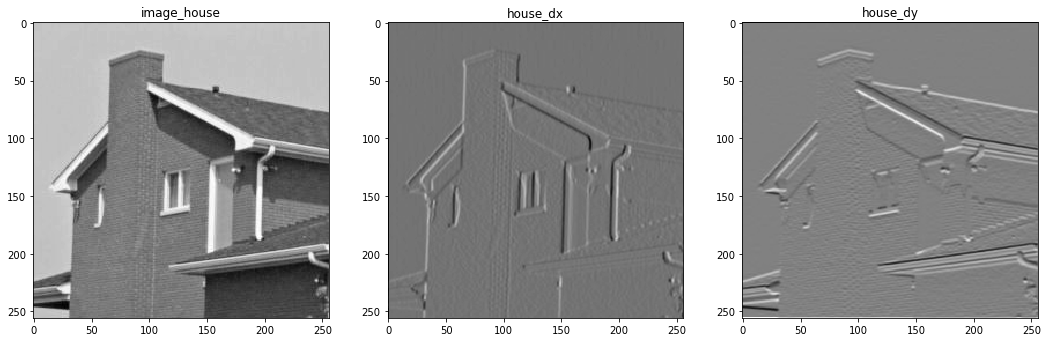

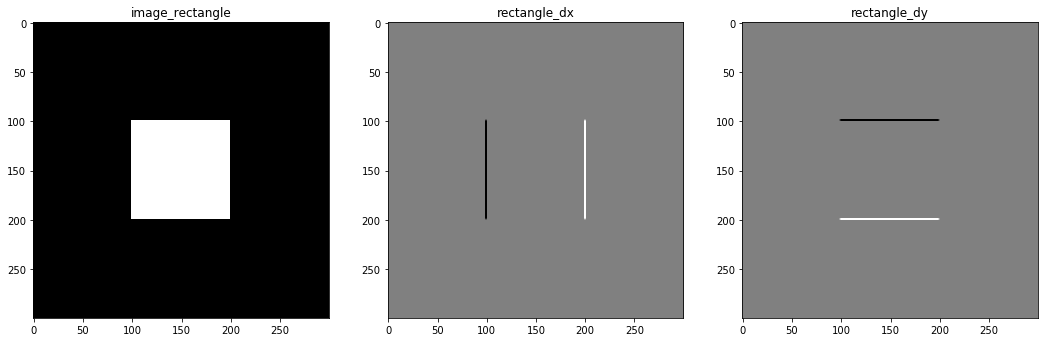

In [3]:
house_dx, house_dy= gradient(image_house)
rectangle_dx, rectangle_dy= gradient(image_rectangle)
affichage_14([image_house,house_dx,house_dy], ["image_house","house_dx","house_dy"] )
affichage_14([image_rectangle,rectangle_dx,rectangle_dy], ["image_rectangle","rectangle_dx","rectangle_dy"] )


#  Commenraire

Le deux filtres de Sobel permettent d'obtenir le gradient horizontal et le gradient verctical.
Le gradient horizontal met en évidence les contours verticaux
le gradient vertical met en évidence les contours horizontaux
Outre le calcul du gradient dans une direction, ces masques effectuent un lissage dans la direction orthogonale, ce qui rend ces masques un peu moins sensibles au bruit


### Question 2 : Noyau gaussien

1. Écrire la fonction ```noyau_gaussien(sigma)``` qui renvoie un tableau Numpy de taille $(2N+1)\times (2N+1)$, avec $N=\lceil3\sigma\rceil$ correspondant à un noyau gaussien centré en l'origine et d'écart-type $\sigma$.

In [4]:
def noyau_gaussien(sigma):
    """ float -> Array """
    h=6*sigma+1
    filtre=np.zeros( (h, h) )
    milieu=3*sigma
    for i in range(h):
        for j in range(h):
            filtre[i][j]=(1/(2*sigma*sigma*math.pi))* \
            math.exp(-(((i-milieu)**2)+((j-milieu)**2))/(2*(sigma**2)))
    return filtre

2. Afficher le noyau gaussien d'écart-type 3. Quelle taille fait-il? Même question avec un écart-type de 10.

taille noyau gaussien3=
361
shape noyau gaussien3=
(19, 19)
taille noyau gaussien10=
3721
shape noyau gaussien10=
(61, 61)


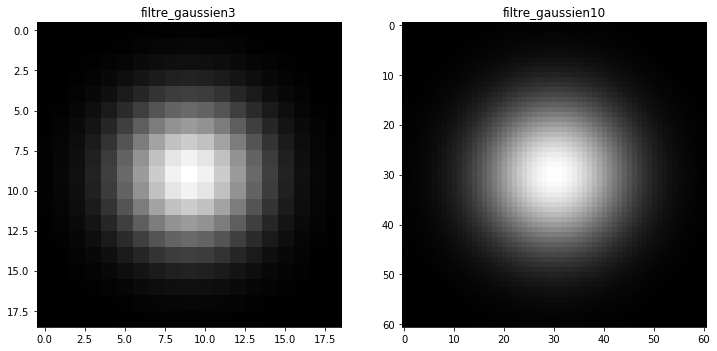

In [5]:
filtre_gaussien3=noyau_gaussien(3)
print("taille noyau gaussien3=")
print(size(filtre_gaussien3))
print("shape noyau gaussien3=")
print(shape(filtre_gaussien3))
filtre_gaussien10=noyau_gaussien(10)
print("taille noyau gaussien10=")
print(size(filtre_gaussien10))
print("shape noyau gaussien10=")
print(shape(filtre_gaussien10))
affichage_14([filtre_gaussien3,filtre_gaussien10], ["filtre_gaussien3","filtre_gaussien10"])



# Remarque
Plus sigma est grand, plus on réduit le bruit, mais plus l'image filtrée est floue

taille noyau gaussien3= 361
shape noyau gaussien3= (19, 19)
taille noyau gaussien10= 3721
shape noyau gaussien10= (61, 61)

### Question 3 : Calcul de l'image de Harris

1. Écrire une fonction ```harris(image, sigma, kappa)``` qui calcule l'image de Harris.

In [6]:
def harris(image, sigma, kappa):
    """ Array*float*float->Array """
    dx, dy= gradient(image)
    gauss = noyau_gaussien(sigma)
    
    dx2=dx*dx
    dy2=dy*dy
    dxy=dx*dy
    
    dx2lisse=scipy.signal.convolve2d(dx2,gauss, mode='same')
    dy2lisse=scipy.signal.convolve2d(dy2,gauss, mode='same')
    dxylisse=scipy.signal.convolve2d(dxy,gauss, mode='same')    
    A=np.array([[dx2lisse, dxylisse],[dxylisse, dy2lisse]])
    
    det= dx2lisse*dy2lisse - dxylisse*dxylisse
    trace= dx2lisse+dy2lisse
    H= det-kappa*trace*trace
    return H
    

2. Visualisez l'image de Harris pour plusieurs images et plusieurs valeurs de paramètres.

# Paramètres: sigma=5 , kappa=0.04



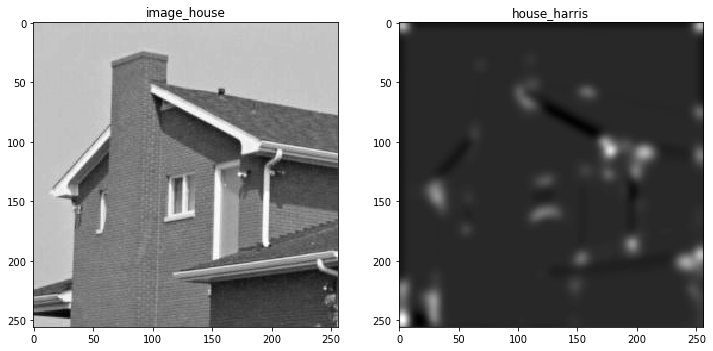

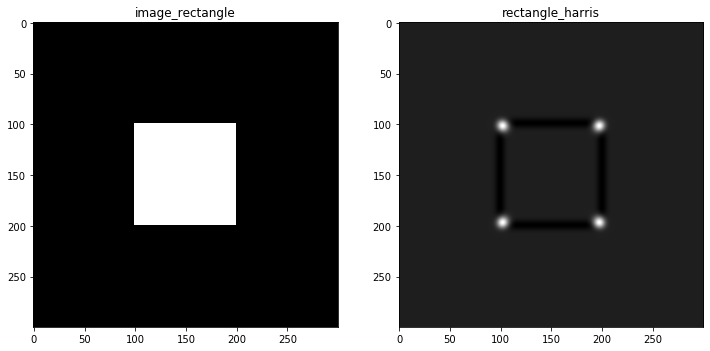

In [7]:
affichage_14([image_house,harris(image_house, 5, 0.04)], ["image_house","house_harris"] )
affichage_14([image_rectangle,harris(image_rectangle, 5, 0.04)], ["image_rectangle","rectangle_harris"] )


# Paramètres: sigma=2 , kappa=0.05

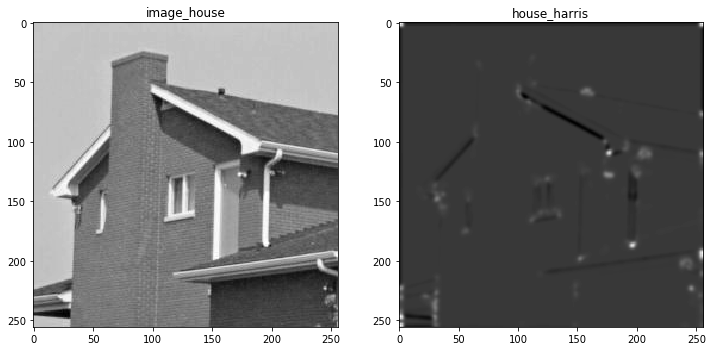

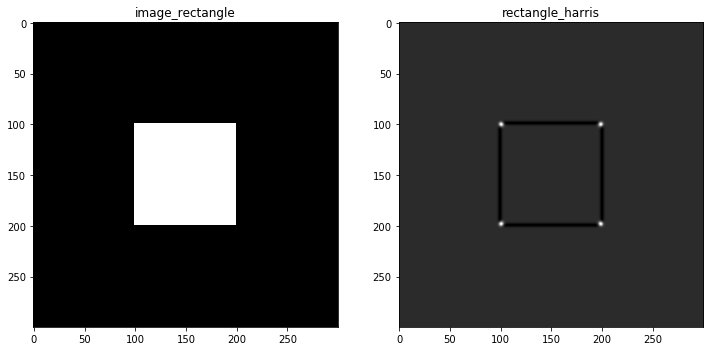

In [8]:
affichage_14([image_house,harris(image_house, 2, 0.05)], ["image_house","house_harris"] )
affichage_14([image_rectangle,harris(image_rectangle, 2, 0.05)], ["image_rectangle","rectangle_harris"] )

# Paramètres: sigma=1 , kappa=0.05

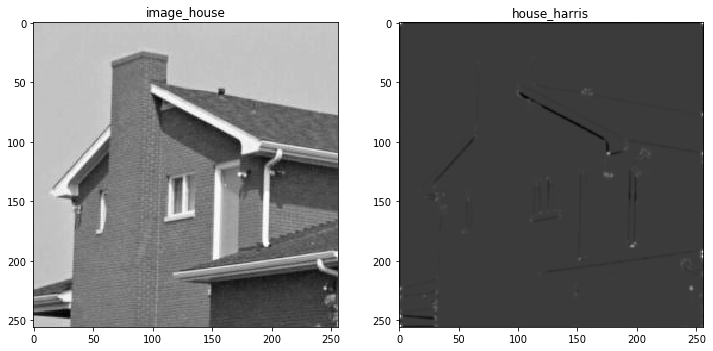

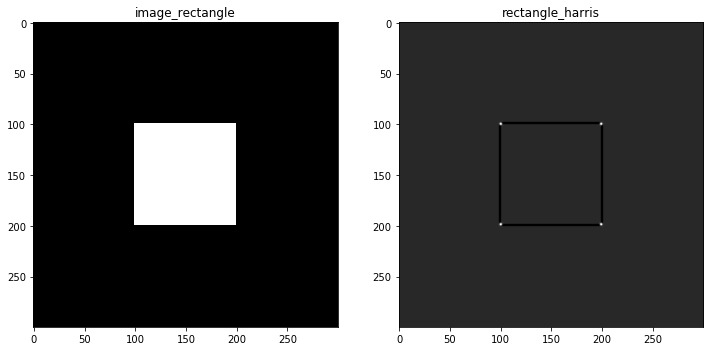

In [9]:
affichage_14([image_house,harris(image_house, 1, 0.04)], ["image_house","house_harris"] )
affichage_14([image_rectangle,harris(image_rectangle, 1, 0.04)], ["image_rectangle","rectangle_harris"] )

# Paramètres: sigma=2 , kappa=3

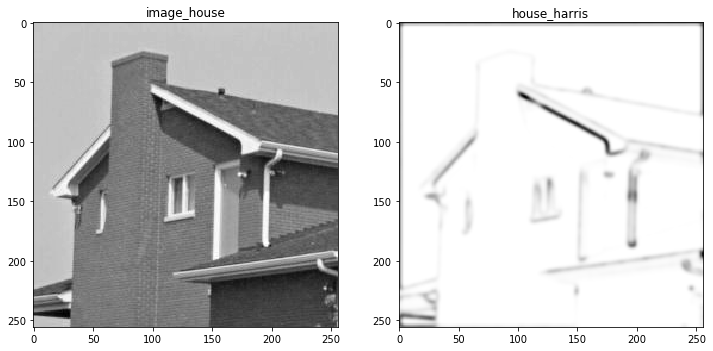

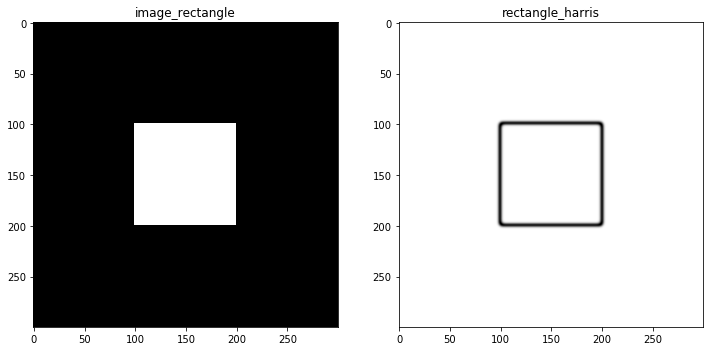

In [10]:
affichage_14([image_house,harris(image_house, 2, 3)], ["image_house","house_harris"] )
affichage_14([image_rectangle,harris(image_rectangle, 2, 3)], ["image_rectangle","rectangle_harris"] )

# Commentaires
Ce qui ressort de l'image de harris:
Le noir représente les valeurs negatives qui correspondent contours de l'image d'origine.
Les valeurs nulles sont associées aux parties uniformes de l'image de base 
et sont dans notre image représentés en gris.
Les valeurs positives representent les coins et sont visibles en blanc.

# Remarque
On constate que de trop grandes valeurs pour kappa font perdre la detection des coins
On constate que plus le sigma est petit, plus les contours détéctés sont fins ( donc plus exacts )


## Exercice 2 : Seuillage et calcul des extrema locaux

On définit un maximum local comme un pixel dont la valeur est supérieur au seuil ```seuil``` et aux valeurs des 8 plus proches voisins. Dans cet exercice, on pourra ne pas traiter les pixels au bord de l'image.

### Question 1 :

1. Écrire un programme ```maxlocal(image_harris, seuil)``` qui prend en entrée une image de Harris et un seuil et qui renvoie un tableau numpy de même taille que l'image de Harris et dont les pixels correspondant à des maximum locaux sont à 1 et les autres à 0. On écrira une version avec parcours de l'image. Puis une version, de nom ```maxlocal_fast()``` sans parcours de l'image, uniquement à l'aide d'opération numpy 



In [11]:
def maxlocal(image_harris, seuil):
    """ Array*float -> Array """
    h,w=shape(image_harris)
    tab=np.zeros(shape(image_harris))
    cpt=0
    #On ignore une ligne sur chaque coté
    for i in range(1,h-1):
        for j in range(1,w-1):
            h= image_harris[i][j-1]
            b= image_harris[i][j+1]
            d= image_harris[i+1][j]
            g= image_harris[i-1][j]
            pixel=image_harris[i][j]
            
            hg=image_harris[i-1][j-1]
            hd=image_harris[i-1][j+1]
            bg=image_harris[i+1][j-1]
            bd=image_harris[i+1][j+1]
            
            #comparaison de la valeur du pixel au seuil et aux 8 valeurs l'entourant
            if(pixel>seuil and pixel > h and pixel >b and pixel>d and pixel>g and pixel>hd and pixel>hg and pixel>bd and pixel>bg):
                tab[i][j]=1
                cpt=cpt+1
    print("le nombre des extremas détécté:"+str(cpt))
    return tab
                        
            


2. Test la fonction ``maxlocal()`` sur l'image ``rectangle``. Afficher l'image des extrema et le nombre d'extrema détecté par la méthode d'Harris. Comparer les temps en utilisant cette fois la fonction ``maxlocal_fast()``.

le nombre des extremas détécté:4


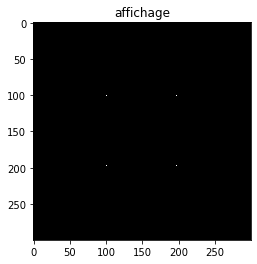

In [12]:
affichage_14([maxlocal(harris(image_rectangle, 5, 0.04), 1)], ["affichage"])

# Commentaire
le nombre des extremas détécté:4, il correspond aux nombres de coins du carré

In [13]:
import scipy.ndimage.filters as filters
def maxlocal_fast(image_harris, seuil):
    nb_voisin=3
    max=filters.maximum_filter(image_harris, nb_voisin)
    image_max=(image_harris==max)
    condition=(max>seuil)
    image_max[condition==0]=0
    return image_max
    

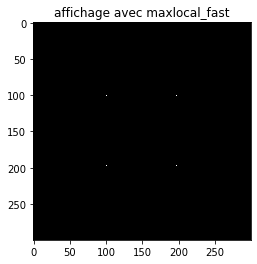

In [14]:
affichage_14([maxlocal_fast(harris(image_rectangle, 5, 0.04), 1)], ["affichage avec maxlocal_fast"])

In [15]:
from time import process_time
mytime = 0
def tic():
    global mytime
    mytime = process_time()
def tac():
    global mytime
    print (process_time()-mytime)
    mytime = process_time()



## Comparaison des temps de calcul

In [16]:
print("max local")
print("test1")
tic()
maxlocal(harris(image_rectangle, 5, 0.04), 1)
tac()
print("test2")
tic()
maxlocal(harris(image_rectangle, 5, 0.04), 1)
tac()
print("test3")
tic()
maxlocal(harris(image_rectangle, 5, 0.04), 1)
tac()
print("test4")
tic()
maxlocal(harris(image_rectangle, 5, 0.04), 1)
tac()
print("test5")
tic()
maxlocal(harris(image_rectangle, 5, 0.04), 1)
tac()
print("max local fast")
print("test1")
tic()
maxlocal_fast(harris(image_rectangle, 5, 0.04), 1)
tac()
print("test2")
tic()
maxlocal_fast(harris(image_rectangle, 5, 0.04), 1)
tac()
print("test3")
tic()
maxlocal_fast(harris(image_rectangle, 5, 0.04), 1)
tac()
print("test4")
tic()
maxlocal_fast(harris(image_rectangle, 5, 0.04), 1)
tac()
print("test5")
tic()
maxlocal_fast(harris(image_rectangle, 5, 0.04), 1)
tac()

max local
test1
le nombre des extremas détécté:4
2.28125
test2
le nombre des extremas détécté:4
1.734375
test3
le nombre des extremas détécté:4
2.6875
test4
le nombre des extremas détécté:4
2.953125
test5
le nombre des extremas détécté:4
2.34375
max local fast
test1
1.59375
test2
2.0
test3
1.828125
test4
1.796875
test5
1.953125


## Commentaire:
suite aux 5 tests effectués sur les deux fonctions, on observe qu'en moyenne maxlocal_fast est plus rapide que maxlocal

2. Modifier le programme et écrire ``coord_maxlocal(image_extrema, seuil)`` pour qu'il renvoit une liste des coordonnées des maxima locaux trouvés dans ``image_extrema``. Une coordonnée est une liste de deux entiers. On testera cette fonction sur l'image ``image_rectangle`` en imprimant les coordonnées des maxima locaux.


In [17]:
def coord_maxlocal(image_extrema):
    """ Array -> list[list[int,int]] """
    return nonzero(image_extrema)


In [18]:
print(coord_maxlocal(maxlocal_fast(harris(image_rectangle, 5, 0.04), 1)))

(array([101, 101, 197, 197], dtype=int64), array([101, 197, 101, 197], dtype=int64))


3. Visualisation: on souhaite supperposer les coins trouvées au dessus l''image. Les coins seront affichés sous la forme d'un cercle rouge. Ceci est possible à l'aide de la fonction ``scatter(x,y,color='red')`` du module ``matplotlib.pyplot``, où ``x`` est le vecteur des abscisses des points à afficher et ``y`` le vecteur des ordonnées correspondantes. Donner le code Python correspondant 
    

In [50]:
def superpose(image, seuil, sigma, kappa, title):
    coord=coord_maxlocal(maxlocal_fast(harris(image, sigma, kappa), seuil))
    x=coord[1]
    y=coord[0]
    plt.imshow(image, cmap='gray')
    plt.scatter(x,y,color='red')
    plt.title(title)
    plt.axis("off")
    plt.show()

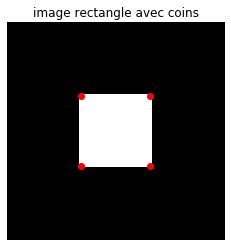

In [51]:
superpose(image_rectangle,1, 5, 0.04, "image rectangle avec coins")

## tests pour m'assurer que les deux fonctions renvoient bien le même nombre d'extremas ( que le voisinage est bien choisi dans la fonction maxlocal_fast)

In [21]:

sigma=5
kappa=0.04
seuil=1
print("rectangle")
print(coord_maxlocal(maxlocal_fast(harris(image_rectangle, sigma, kappa), seuil))[0].size)
print(coord_maxlocal(maxlocal(harris(image_rectangle, sigma, kappa), seuil))[0].size)
print("house")
print(coord_maxlocal(maxlocal_fast(harris(image_house, sigma, kappa), seuil))[0].size)
print(coord_maxlocal(maxlocal(harris(image_house, sigma, kappa), seuil))[0].size)
print("jussieu")
print(coord_maxlocal(maxlocal_fast(harris(image_jussieu, sigma, kappa), seuil))[0].size)
print(coord_maxlocal(maxlocal(harris(image_jussieu, sigma, kappa), seuil))[0].size)
print("carrelage")
print(coord_maxlocal(maxlocal_fast(harris(image_carrelage, sigma, kappa), seuil))[0].size)
print(coord_maxlocal(maxlocal(harris(image_carrelage, sigma, kappa), seuil))[0].size)

rectangle
4
le nombre des extremas détécté:4
4
house
80
le nombre des extremas détécté:80
80
jussieu
281
le nombre des extremas détécté:281
281
carrelage
202
le nombre des extremas détécté:202
202


## Observation:
Après superposition des coins détéctés sur notre image de base, on observe qu'ils correspondent bel et bien au coin du rectangle !

## Exercice 3 : Expérimentations

### Question 1
Expérimentez pour plusieurs images le détecteur de points de Harris avec plusieurs valeurs des paramètres sigma, kappa et seuil et en affichant l'image et les coins détectés en rouge.

Remarque importante: si les points détectés ne semblent pas correspondre visuellement à ce que vous voyez dans l'image, lisez la documentation de ```scatter()``` et revoyez éventuellement la fonction ``coord_maxlocal()``.


#### Image rectangle:

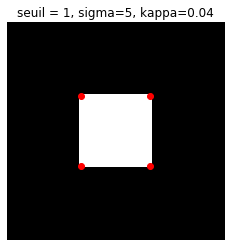

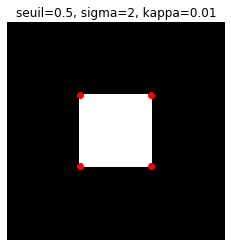

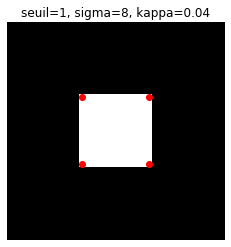

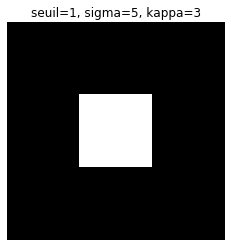

In [61]:
superpose(image_rectangle,1, 5, 0.04, "seuil = 1, sigma=5, kappa=0.04")
superpose(image_rectangle,0.5, 2, 0.01, "seuil=0.5, sigma=2, kappa=0.01")
superpose(image_rectangle,1, 8, 0.04, "seuil=1, sigma=8, kappa=0.04")
superpose(image_rectangle,1, 5, 3, "seuil=1, sigma=5, kappa=3")


#### Image Jussieu:

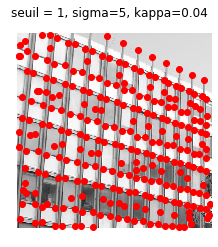

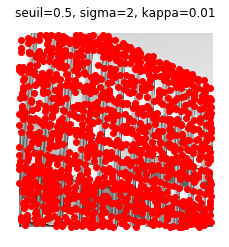

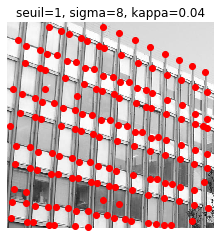

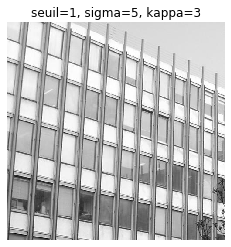

In [64]:
superpose(image_jussieu,1, 5, 0.04, "seuil = 1, sigma=5, kappa=0.04")
superpose(image_jussieu,0.5, 2, 0.04, "seuil=0.5, sigma=2, kappa=0.04")
superpose(image_jussieu,1, 8, 0.04, "seuil=1, sigma=8, kappa=0.04")
superpose(image_jussieu,1, 5, 3, "seuil=1, sigma=5, kappa=3")

#### Image house:

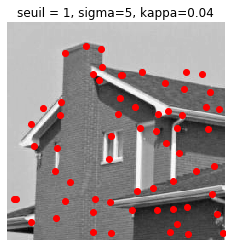

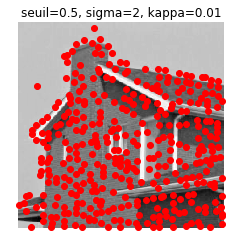

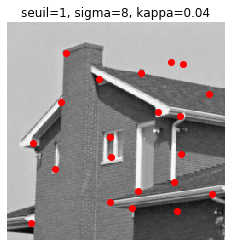

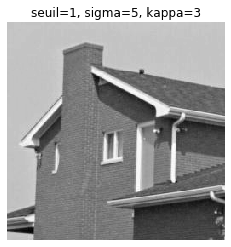

In [65]:
superpose(image_house,1, 5, 0.04, "seuil = 1, sigma=5, kappa=0.04")
superpose(image_house,0.5, 2, 0.04, "seuil=0.5, sigma=2, kappa=0.04")
superpose(image_house,1, 8, 0.04, "seuil=1, sigma=8, kappa=0.04")
superpose(image_house,1, 5, 3, "seuil=1, sigma=5, kappa=3")

##### COMMENTAIRE:
Si on prend une valeur de sigma basse, les points détectés sont plus nombreux et très peu distingeable les uns des autres. (ex: sigma=2)
Au contraire, si prend une valeur de sigma grande (ex:sigma = 8), moins de points sont détectés et on observe une structure dans le modele de recherche.
Enfin, si kappa est supérieur à 1, aucun point n'est détecté.

### Question 2

Considerez le détecteur de point vu en cours, c'est-à-dire une convolution avec le noyau 
$\begin{pmatrix} -1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 & -1 & -1 \end{pmatrix}$. Là encore, il faudra déterminer les maxima locaux ainsi que leur coordonnées pour les afficher.



#### Image rectangle:

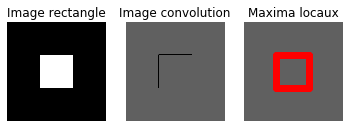

In [43]:
from scipy import signal
laplace = array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) 
img = signal.convolve2d(array(image_rectangle),laplace,mode='same')

max = maxlocal_fast(img,1)
coord = coord_maxlocal(max)
x=coord[1]
y=coord[0]

plt.subplot(1,3,1)
plt.imshow(image_rectangle,cmap='gray')
plt.title('Image rectangle')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img,cmap='gray')
plt.title('Image convolution')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Maxima locaux')
plt.imshow(img,cmap='gray')
plt.scatter(x,y,color='red')
plt.axis('off')
plt.show()



##### COMMENTAIRE:
Cette méthode de détection des points par convolution est efficace pour la detection des contours. Avec l'image rectangle, on détecte les contours du rectangle centrale de l'image.

#### Image Jussieu:

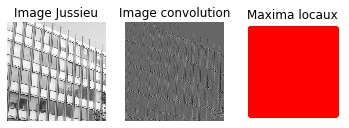

In [44]:
laplace = array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) 
img = signal.convolve2d(array(image_jussieu),laplace,mode='same')

max = maxlocal_fast(img,1)
coord = coord_maxlocal(max)
x=coord[1]
y=coord[0]

plt.subplot(1,3,1)
plt.imshow(image_jussieu,cmap='gray')
plt.title('Image Jussieu')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img,cmap='gray')
plt.title('Image convolution')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Maxima locaux')
plt.imshow(img,cmap='gray')
plt.scatter(x,y,color='red')
plt.axis('off')
plt.show()

##### Commentaire:
Dans le cas de l'image Jussieu, cette méthode est totalement inefficace. En effet, la convolution ne permet pas une détection efficace des points considérés comme maxima locaux. Ainsi, tout les points de l'image sont considérés comme maximaux.

#### Image carrelage:

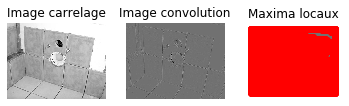

In [47]:
laplace = array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) 
img = signal.convolve2d(array(image_carrelage),laplace,mode='same')

max = maxlocal_fast(img,1)
coord = coord_maxlocal(max)
x=coord[1]
y=coord[0]


plt.subplot(1,3,1)
plt.imshow(image_carrelage,cmap='gray')
plt.title('Image carrelage')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img,cmap='gray')
plt.title('Image convolution')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Maxima locaux')
plt.imshow(img,cmap='gray')
plt.scatter(x,y,color='red')
plt.axis('off')
plt.show()

##### Commentaire:
Comme pour l'image Jussieu, la détection de points par convolution de l'image carrelage n'est pas efficace.

#### Image House:

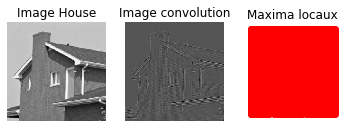

In [48]:
laplace = array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) 
img = signal.convolve2d(array(image_house),laplace,mode='same')

max = maxlocal_fast(img,1)
coord = coord_maxlocal(max)
x=coord[1]
y=coord[0]

plt.subplot(1,3,1)
plt.imshow(image_house,cmap='gray')
plt.title('Image House')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img,cmap='gray')
plt.title('Image convolution')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Maxima locaux')
plt.imshow(img,cmap='gray')
plt.scatter(x,y,color='red')
plt.axis('off')
plt.show()